## Imports

In [1]:
import sys
import os 
import warnings
import numpy as np

pkg_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(pkg_path)

np.set_printoptions(threshold=np.inf, suppress=True, linewidth=np.inf)
warnings.filterwarnings(action='ignore', category=UserWarning)

import shtmbss2.addsrc
from shtmbss2.common.config import RuntimeConfig, Backends

In [2]:
!pip install colorlog

In [3]:
RuntimeConfig.backend = Backends.BRAIN_SCALES_2

In [4]:
if RuntimeConfig.backend == Backends.BRAIN_SCALES_2:
    import shtmbss2.brainscales2.patches
    from shtmbss2.brainscales2.hardware import hardware_initialization
    from shtmbss2.brainscales2.network import SHTMTotal
    hardware_initialization()
elif RuntimeConfig.backend == Backends.NEST:
    from shtmbss2.nest.network import SHTMTotal

INFO  16:23:39,675  demo_helpers Connection to hxcube7fpga0chip57_1 established


## Configuration

In [5]:
# pynn.logger.default_config(level=pynn.logger.LogLevel.DEBUG)

v_rest_calib = 275
num_sim_steps = 150
debug = False

## Network Initialization

In [6]:
shtm = SHTMTotal(log_permanence='all', log_weights='all')

shtm.init_neurons()
shtm.init_connections(debug=debug)
shtm.init_external_input(False)

if RuntimeConfig.backend == Backends.BRAIN_SCALES_2:
    shtm.init_rec_exc()

Starting preprocessing/calibration...
Initialized external input for sequence(s) [['A', 'C', 'B'], ['D', 'C', 'B']]


## Network Emulation & Plotting

In [7]:
shtm.run(steps=1, plasticity_enabled=False)

Running emulation step 1/1
Current time: 0


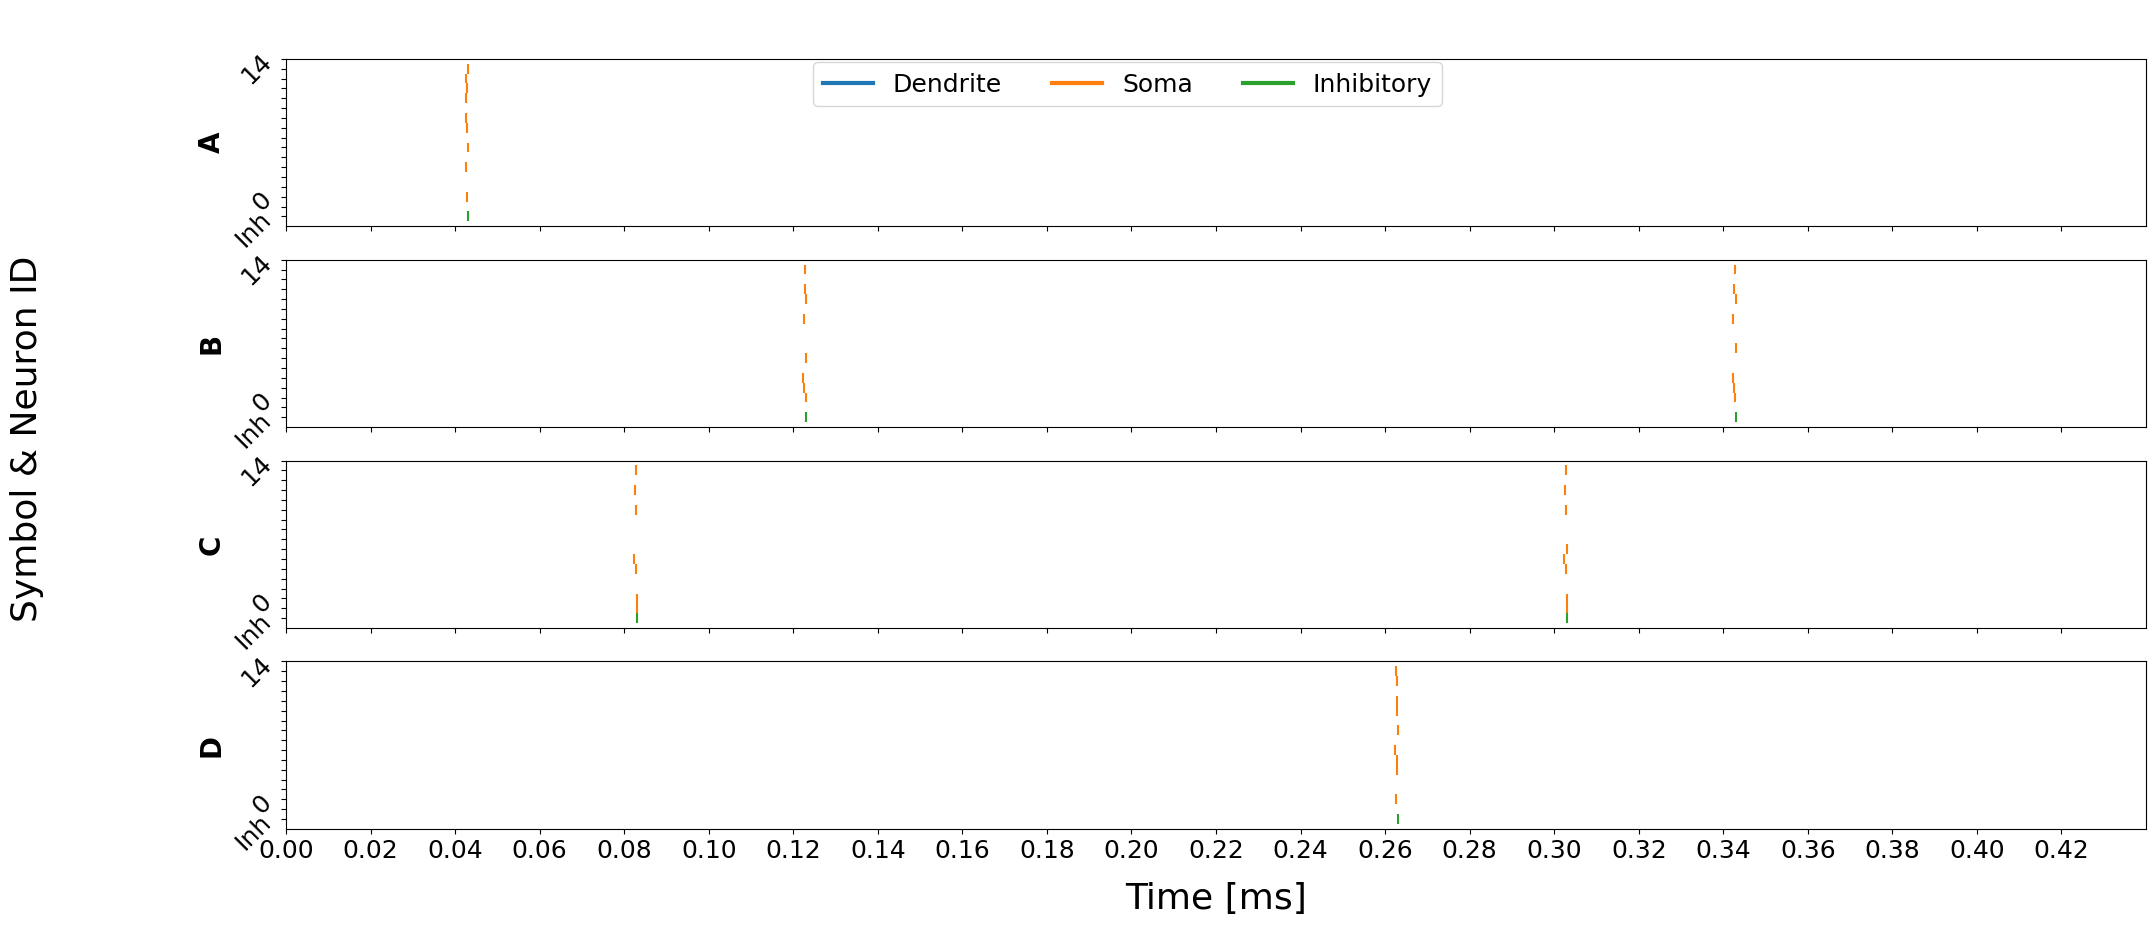

In [8]:
%matplotlib inline

shtm.plot_events(neuron_types="all", size=(24, 10))

In [9]:
# Set new weights for plastic synapses (exc-exc)
# shtm.set_weights_exc_exc(400, 7, post_ids=[1,2,3], p_con=1.0)

In [10]:
shtm.run(steps=10, plasticity_enabled=True)

Running emulation step 1/10
Current time: 0.44
Starting plasticity calculations
Finished plasticity calculation 1/12
Finished plasticity calculation 2/12
Finished plasticity calculation 3/12
Finished plasticity calculation 4/12
Finished plasticity calculation 5/12
Finished plasticity calculation 6/12
Finished plasticity calculation 7/12
Finished plasticity calculation 8/12
Finished plasticity calculation 9/12
Finished plasticity calculation 10/12
Finished plasticity calculation 11/12
Finished plasticity calculation 12/12
Running emulation step 2/10
Current time: 0.88
Starting plasticity calculations
Finished plasticity calculation 1/12
Finished plasticity calculation 2/12
Finished plasticity calculation 3/12
Finished plasticity calculation 4/12
Finished plasticity calculation 5/12
Finished plasticity calculation 6/12
Finished plasticity calculation 7/12
Finished plasticity calculation 8/12
Finished plasticity calculation 9/12
Finished plasticity calculation 10/12
Finished plasticity ca

WARN  16:34:07,452  lib-rcf.OnDemandUpload.loop_upload Error while uploading: Unexpected peer disconnection.
WARN  16:34:08,462  lib-rcf.OnDemandUpload.loop_upload Error while uploading: Unable to establish network connection. Connection refused
WARN  16:34:09,473  lib-rcf.OnDemandUpload.loop_upload Error while uploading: Unable to establish network connection. Connection refused
WARN  16:34:10,499  lib-rcf.OnDemandUpload.loop_upload Error while uploading: Unexpected peer disconnection.
WARN  16:34:11,520  lib-rcf.OnDemandUpload.loop_upload Error while uploading: Unexpected peer disconnection.


Finished plasticity calculation 10/12
Finished plasticity calculation 11/12
Finished plasticity calculation 12/12
Running emulation step 6/10
Current time: 2.64
Starting plasticity calculations
Finished plasticity calculation 1/12
Finished plasticity calculation 2/12
Finished plasticity calculation 3/12
Finished plasticity calculation 4/12
Finished plasticity calculation 5/12
Finished plasticity calculation 6/12
Finished plasticity calculation 7/12
Finished plasticity calculation 8/12
Finished plasticity calculation 9/12
Finished plasticity calculation 10/12
Finished plasticity calculation 11/12
Finished plasticity calculation 12/12
Running emulation step 7/10
Current time: 3.08
Starting plasticity calculations
Finished plasticity calculation 1/12
Finished plasticity calculation 2/12
Finished plasticity calculation 3/12
Finished plasticity calculation 4/12
Finished plasticity calculation 5/12
Finished plasticity calculation 6/12
Finished plasticity calculation 7/12
Finished plasticity 

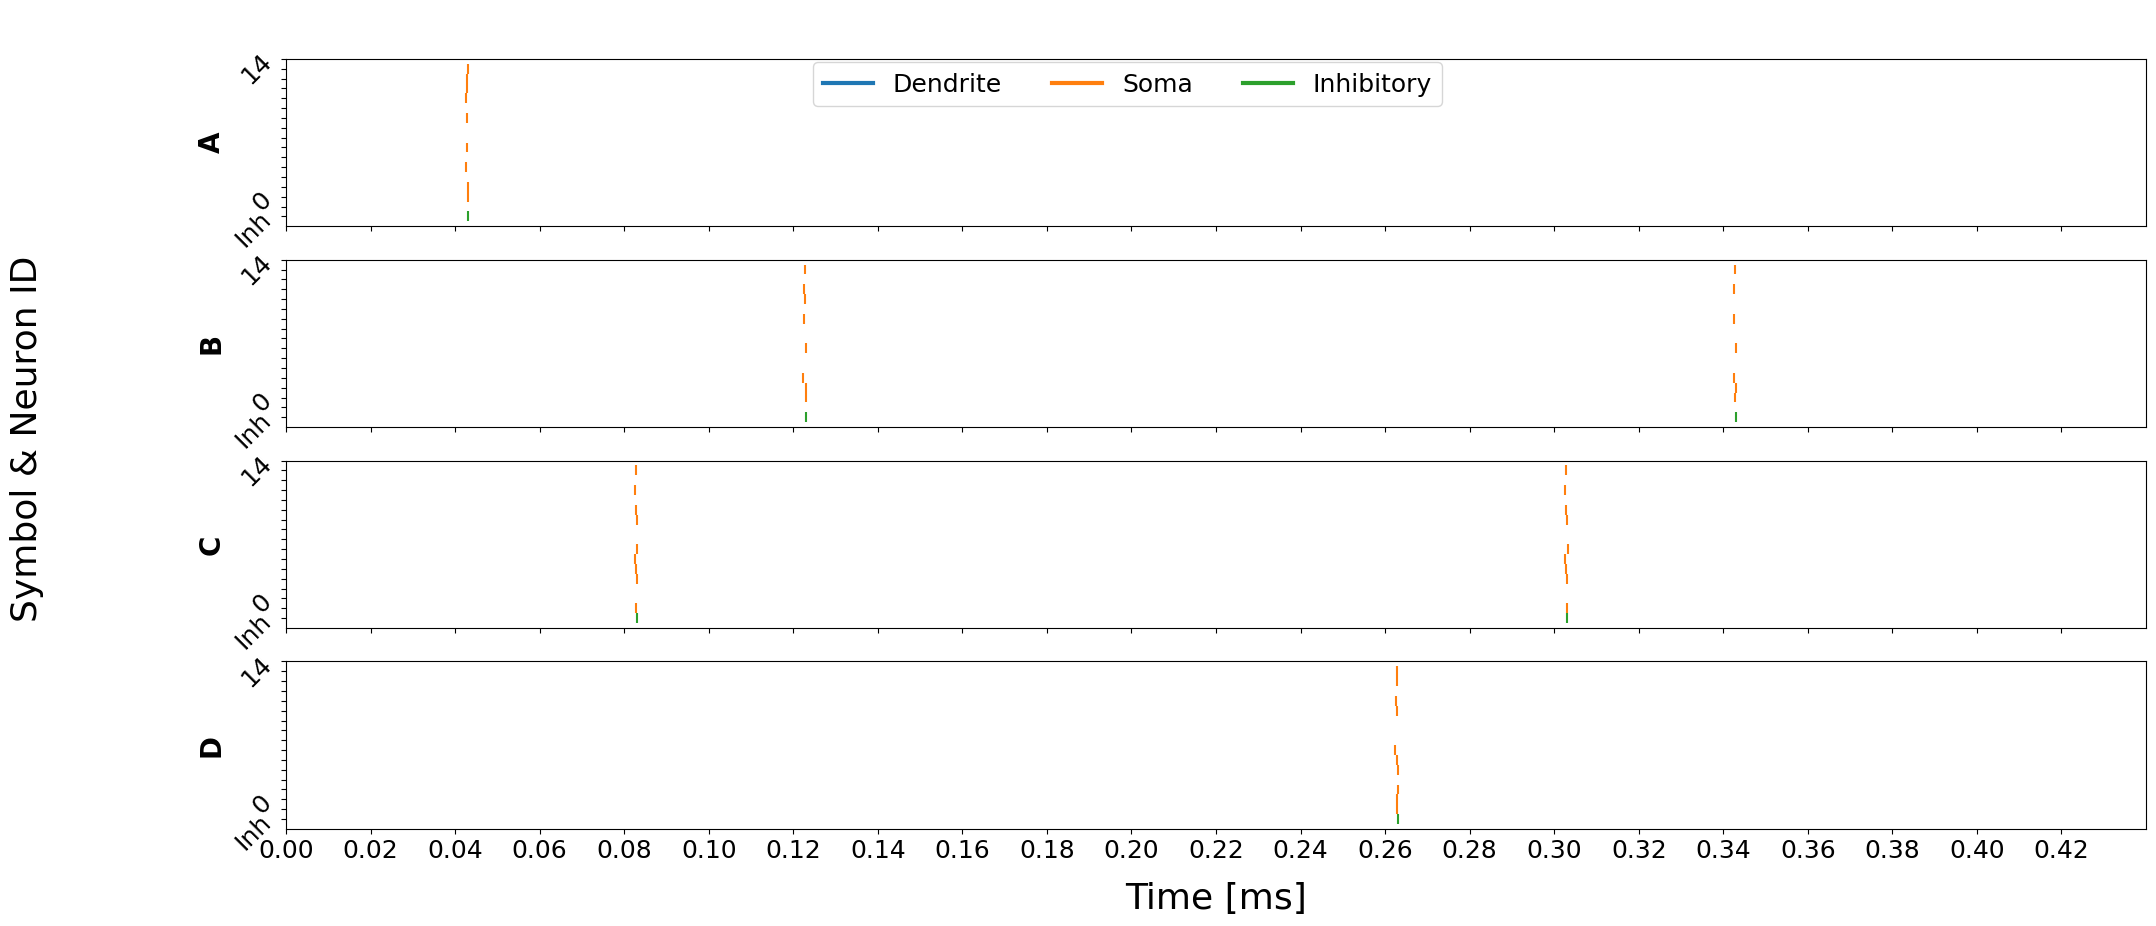

In [11]:
%matplotlib inline

shtm.plot_events(neuron_types="all", size=(24, 10))

In [12]:
shtm.run(steps=1, plasticity_enabled=True)

Running emulation step 1/1
Current time: 4.840000000000001
Starting plasticity calculations
Finished plasticity calculation 1/12
Finished plasticity calculation 2/12
Finished plasticity calculation 3/12
Finished plasticity calculation 4/12
Finished plasticity calculation 5/12
Finished plasticity calculation 6/12
Finished plasticity calculation 7/12
Finished plasticity calculation 8/12
Finished plasticity calculation 9/12
Finished plasticity calculation 10/12
Finished plasticity calculation 11/12
Finished plasticity calculation 12/12


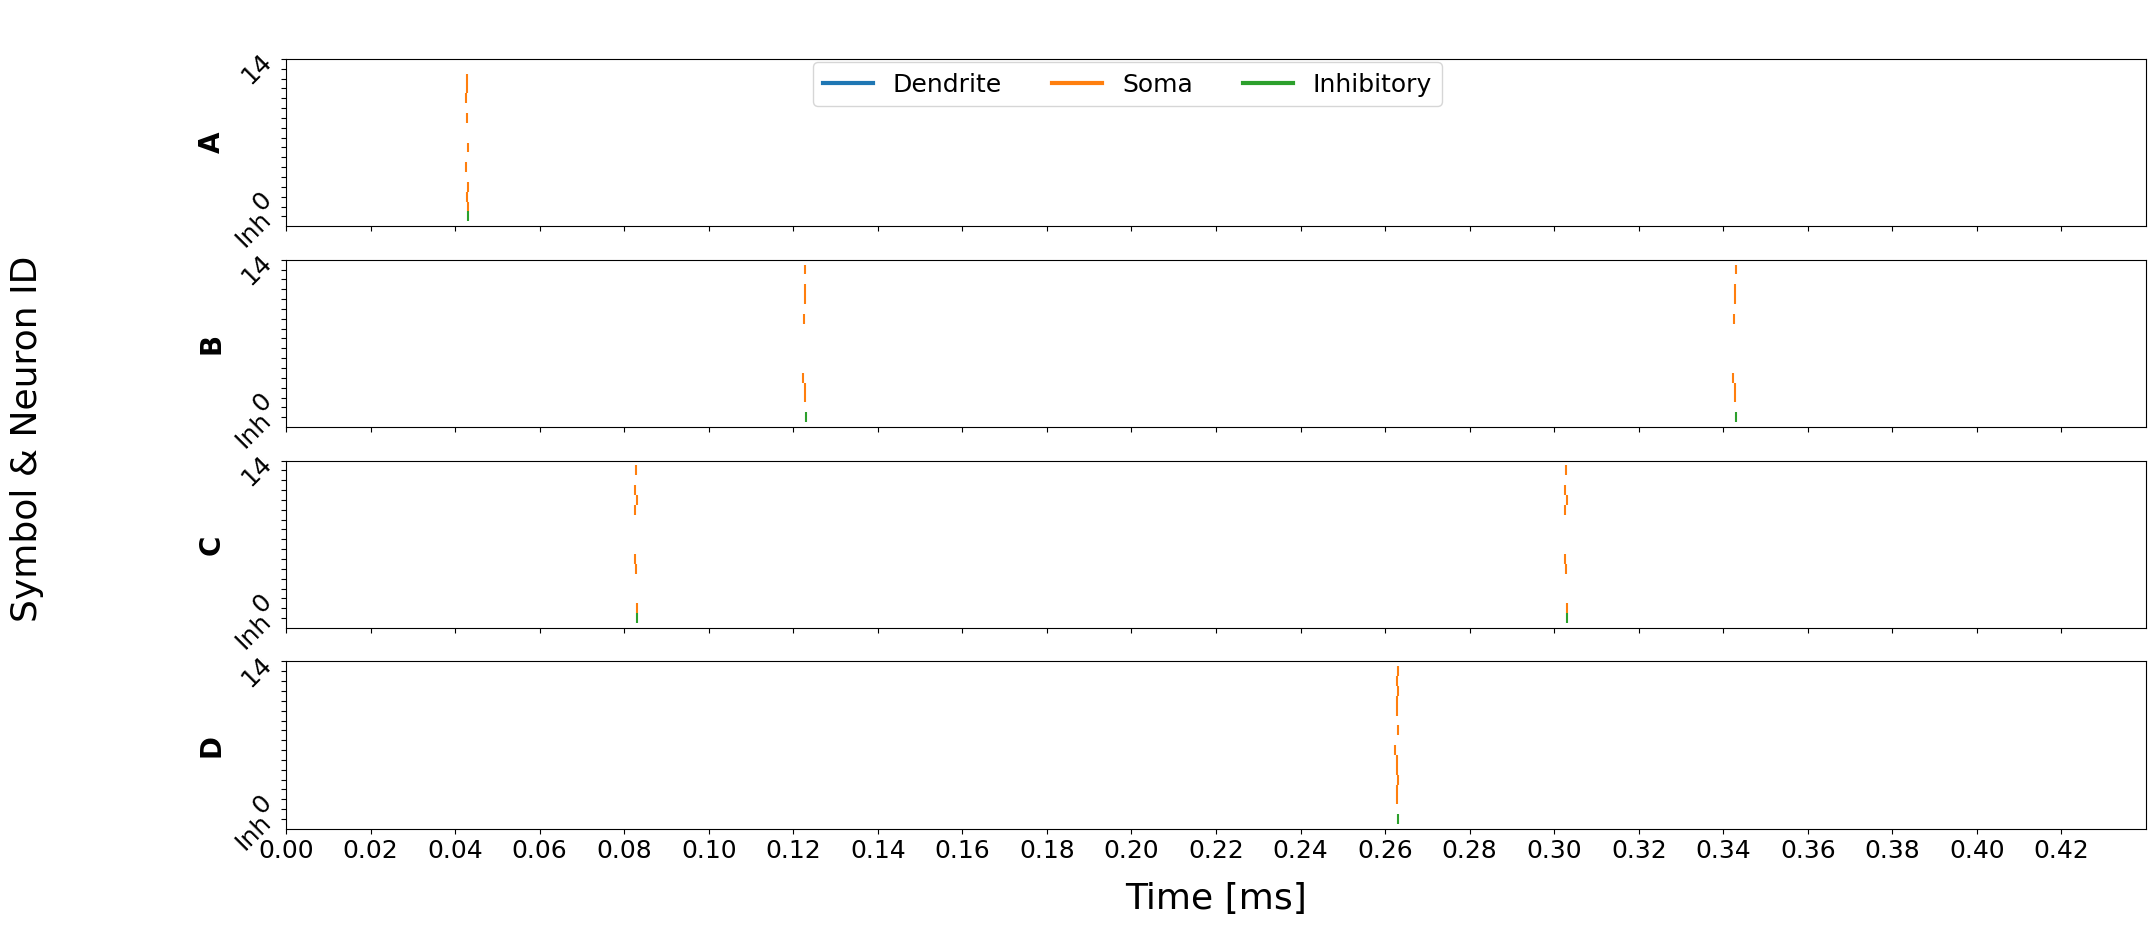

In [13]:
%matplotlib inline

shtm.plot_events(neuron_types="all", size=(24, 10))

Running emulation step 1/1
Current time: 5.280000000000001


TypeError: unsupported operand type(s) for +: 'float' and 'NoneType'

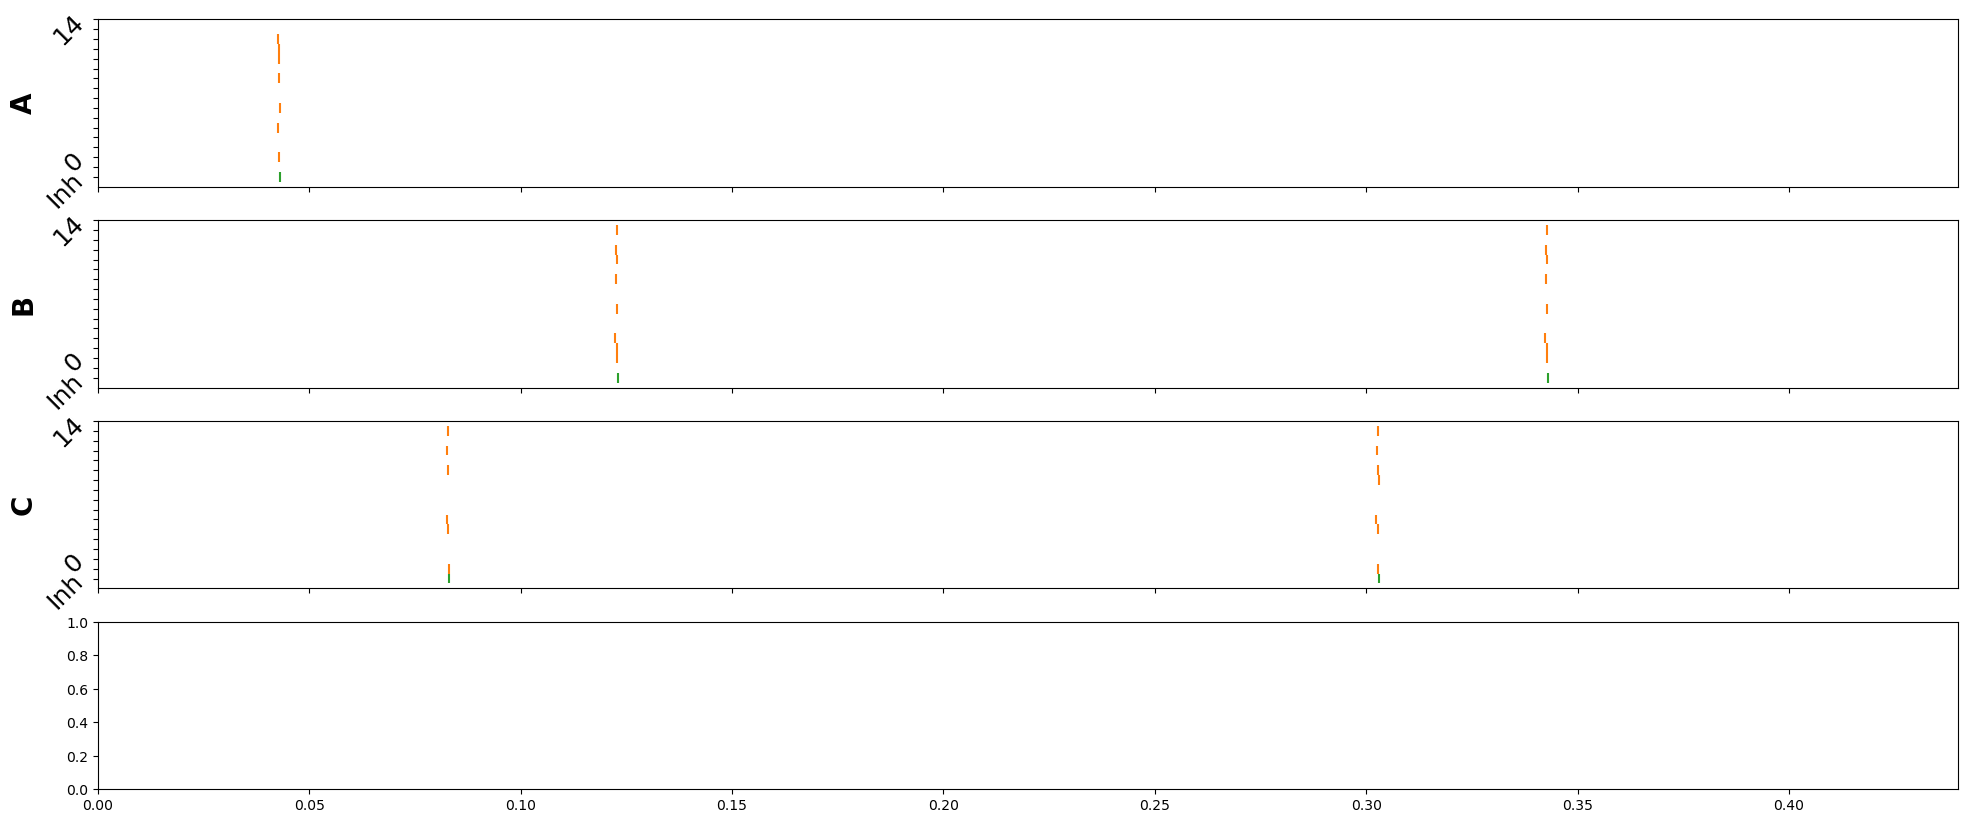

In [14]:
shtm.set_weights_exc_exc(400, 2, post_ids=[3,4,5], p_con=1.0)
shtm.run(steps=1, plasticity_enabled=False)

%matplotlib inline
shtm.plot_events(neuron_types="all", size=(24, 10))

## Additional Plotting

In [ ]:
%matplotlib inline

shtm.plot_permanence_diff()

In [ ]:
%matplotlib inline

shtm.plot_permanence_history(plot_con_ids=[1, 7])

In [ ]:
%matplotlib inline

shtm.plot_v_exc(alphabet_range=[2], neuron_range=[1], neuron_type=1, runtime=runtime)

In [ ]:
%matplotlib inline

shtm.plot_v_exc(alphabet_range=[0], neuron_range='all', neuron_type=1, runtime=runtime, show_legend=False)

In [ ]:
%matplotlib inline

shtm.plot_v_exc(alphabet_range=range(1, alphabet_size))

## Additional Analysis

In [ ]:
for i in range(len(shtm.con_plastic)):
    shtm.con_plastic[i].mature_weight = 120
    print(i, shtm.con_plastic[i].projection.label.split('_')[1], shtm.con_plastic[i].get_all_connection_ids())
    

In [ ]:
arr = np.array(shtm.con_plastic[1].permanences)

In [ ]:
for c in shtm.con_plastic[1].projection.connections:
    print(f'C[{c.presynaptic_index}, {c.postsynaptic_index}].weight = {c.weight}')

In [ ]:
np.set_printoptions(threshold=np.inf, suppress=True, linewidth=np.inf)
shtm.con_plastic[1].projection.get("weight", format="array")

In [ ]:
shtm.con_plastic[7].projection.get("weight", format="array")

In [ ]:
# Print spikes form spiketrain
for s in shtm.con_plastic[1].projection.post.get_data("spikes").segments[-1].spiketrains:
    print(s)
print(len(shtm.con_plastic[1].projection.post.get_data("spikes").segments[-1].spiketrains))
print(len(shtm.con_plastic[1].projection.connections))

In [ ]:
for con in shtm.con_plastic:
    print(f"Sum(P[{con.projection.label}]) = {np.sum(con.permanences[-1] - con.permanences[0])}")

In [ ]:
dendrites, somas = shtm.get_spike_times(0.44, 0.1e-2)

print(somas)

In [ ]:
for i_plastic in range(len(shtm.con_plastic)):
    shtm.con_plastic[i_plastic].lambda_plus *= 2
    shtm.con_plastic[i_plastic].lambda_minus *= 2
    shtm.con_plastic[i_plastic].lambda_h *= 2
    
    # print(f"Sum(P[{con.projection.label}]) = {np.sum(con.permanences[-1] - con.permanences[0])}")

## Check indices

In [ ]:
dendrites, somas = shtm.neurons_exc[0]

print(somas.all_cells)
print(somas.id_to_index(13))

print(somas.get_data("spikes").segments[-1].spiketrains[8])
print(shtm.con_plastic[0].projection.pre.get_data("spikes").segments[-1].spiketrains[8])

## Check spikes

In [ ]:
dendrites, somas = shtm.neurons_exc[0]

spike_ids_a = list()
spike_ids_b = list()

# Print spikes form spiketrain
for s in somas.get_data("spikes").segments[-1].spiketrains:
    print(s)
    if len(s) > 0:
        print(s[0]/0.1e-3)
        spike_ids_a.append(int(s[0]/0.1e3))

    # for t in np.linspace(0., runtime, int(runtime / 0.1e-3)):
        
    
print(len(somas.get_data("spikes").segments[-1].spiketrains))



In [ ]:
print(shtm.neurons_exc[0][0].get("tau_m"))
print(shtm.neurons_inh[0].tau_m)
w = shtm.exc_to_inh[1].get("weight", format="array")
print(w)
print(pynn.get_current_time())

## Save objects

In [ ]:
import pickle

experiment_name = "shtm_off-chip_01"

with open(f'../evaluation/objects/{experiment_name}.pkl', 'wb') as out_file:
    pickle.dump(shtm, out_file)

In [ ]:
with open(f'../evaluation/objects/{experiment_name}.pkl', 'rb') as in_file:
    obj = pickle.load(in_file)

## Plotting - Events - All Symbols

In [ ]:
%matplotlib inline

seq = 2

fig_title = "Neuronal Events for Sequence {D, C, B} - After Learning"

file_path = f"../evaluation/figures/shtm-bss2_eval_learning-off-chip_seq-0{seq}_before-learning"
# file_path = f"../evaluation/figures/shtm-bss2_eval_learning-off-chip_seq-0{seq}_after-learning"

# file_path += "_a"

if seq == 1:
    fig = shtm.plot_events(shtm, size=[12, 10], x_lim_lower=0, x_lim_upper=0.14, seq_start=0.0, seq_end=0.14, fig_title=fig_title, file_path=file_path)
elif seq == 2:
    fig = shtm.plot_events(shtm, size=[12, 10], x_lim_lower=0.22, x_lim_upper=0.36, seq_start=0.22, seq_end=0.36, fig_title=fig_title, file_path=file_path)
    


## Plotting - Events - One Symbol

In [ ]:
%matplotlib inline

fig_title = "Neuronal Events for Sequence {D, C, B} - After Learning"
file_path = f"../evaluation/figures/shtm-bss2_eval_limits-spikes_w-inh"

# file_path += "_a"

fig = shtm.plot_events(shtm, neuron_types="all", symbols=[2], size=[12, 10], x_lim_lower=0, x_lim_upper=0.14, seq_start=0.0, seq_end=0.14, fig_title=fig_title, file_path=file_path)


spikes = shtm.neurons_exc[2][1].get_data("spikes").segments[-1].spiketrains

In [ ]:
# file_path_open = f"../evaluation/figures/shtm-bss2_eval_limits-volts_w-inh"
# file_path_open = f"../evaluation/figures/shtm-bss2_eval_limits-volts_wo-inh"
# file_path_open = f"../evaluation/figures/shtm-bss2_eval_limits-spikes_w-inh"
file_path_open = f"../evaluation/figures/shtm-bss2_eval_limits-spikes_wo-inh"

figx = pickle.load(open(f'{file_path_open}.fig.pickle', 'rb'))
figx.set_size_inches(12, 6)

figx.legends = []
figx.suptitle("")
figx.subplots_adjust(top=0.85)
neuron_types = [NeuronType.Dendrite, NeuronType.Soma, NeuronType.Inhibitory]
custom_lines = [Line2D([0], [0], color=f"C{n.ID}", label=n.NAME.capitalize(), lw=3) for n in neuron_types]
plt.figlegend(handles=custom_lines, loc=(0.402, 0.888), ncol=3, labelspacing=0., fontsize=18, fancybox=True, borderaxespad=1)


# figx.show()

figx.savefig(f"{file_path_open}.pdf", bbox_inches='tight')
# figx.savefig(f"{file_path_open}.png")

## Final Plots - Voltage

In [ ]:
%matplotlib inline

# plt.rcParams.update({'font.size': 12})

seq = 2

# file_path = f"../evaluation/figures/shtm-bss2_eval_learning-off-chip_seq-0{seq}_before-learning"
# file_path = f"../evaluation/figures/shtm-bss2_eval_learning-off-chip_seq-0{seq}_after-learning"
file_path = f"../evaluation/figures/shtm-bss2_eval_limits-volts_w-inh"

# file_path += "_a"

# if seq == 1:
    # fig = plot_v_exc(shtm, [0], neuron_range="all", size=[12, 10], x_lim_lower=0, x_lim_upper=0.14, seq_start=0.0, seq_end=0.14, file_path=file_path)
# elif seq == 2:
    # fig = plot_v_exc(shtm, [0], neuron_range="all", size=[12, 10], x_lim_lower=0.22, x_lim_upper=0.36, seq_start=0.22, seq_end=0.36, file_path=file_path)

shtm.plot_v_exc(shtm, [2], neuron_range="all", size=[12, 10], runtime=0.14, file_path=file_path)

    
